In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

In [28]:
df = pd.read_csv('forestfires.csv')
column_names = [name.lower() for name in df.columns]

In [29]:
column_names

['x',
 'y',
 'month',
 'day',
 'ffmc',
 'dmc',
 'dc',
 'isi',
 'temp',
 'rh',
 'wind',
 'rain',
 'area']

In [30]:
df.columns = column_names

In [31]:
df.head()

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [32]:
df['log_area'] = np.where(df['area']==0, 0, np.log(df['area']))


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [33]:
df.head()

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,log_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


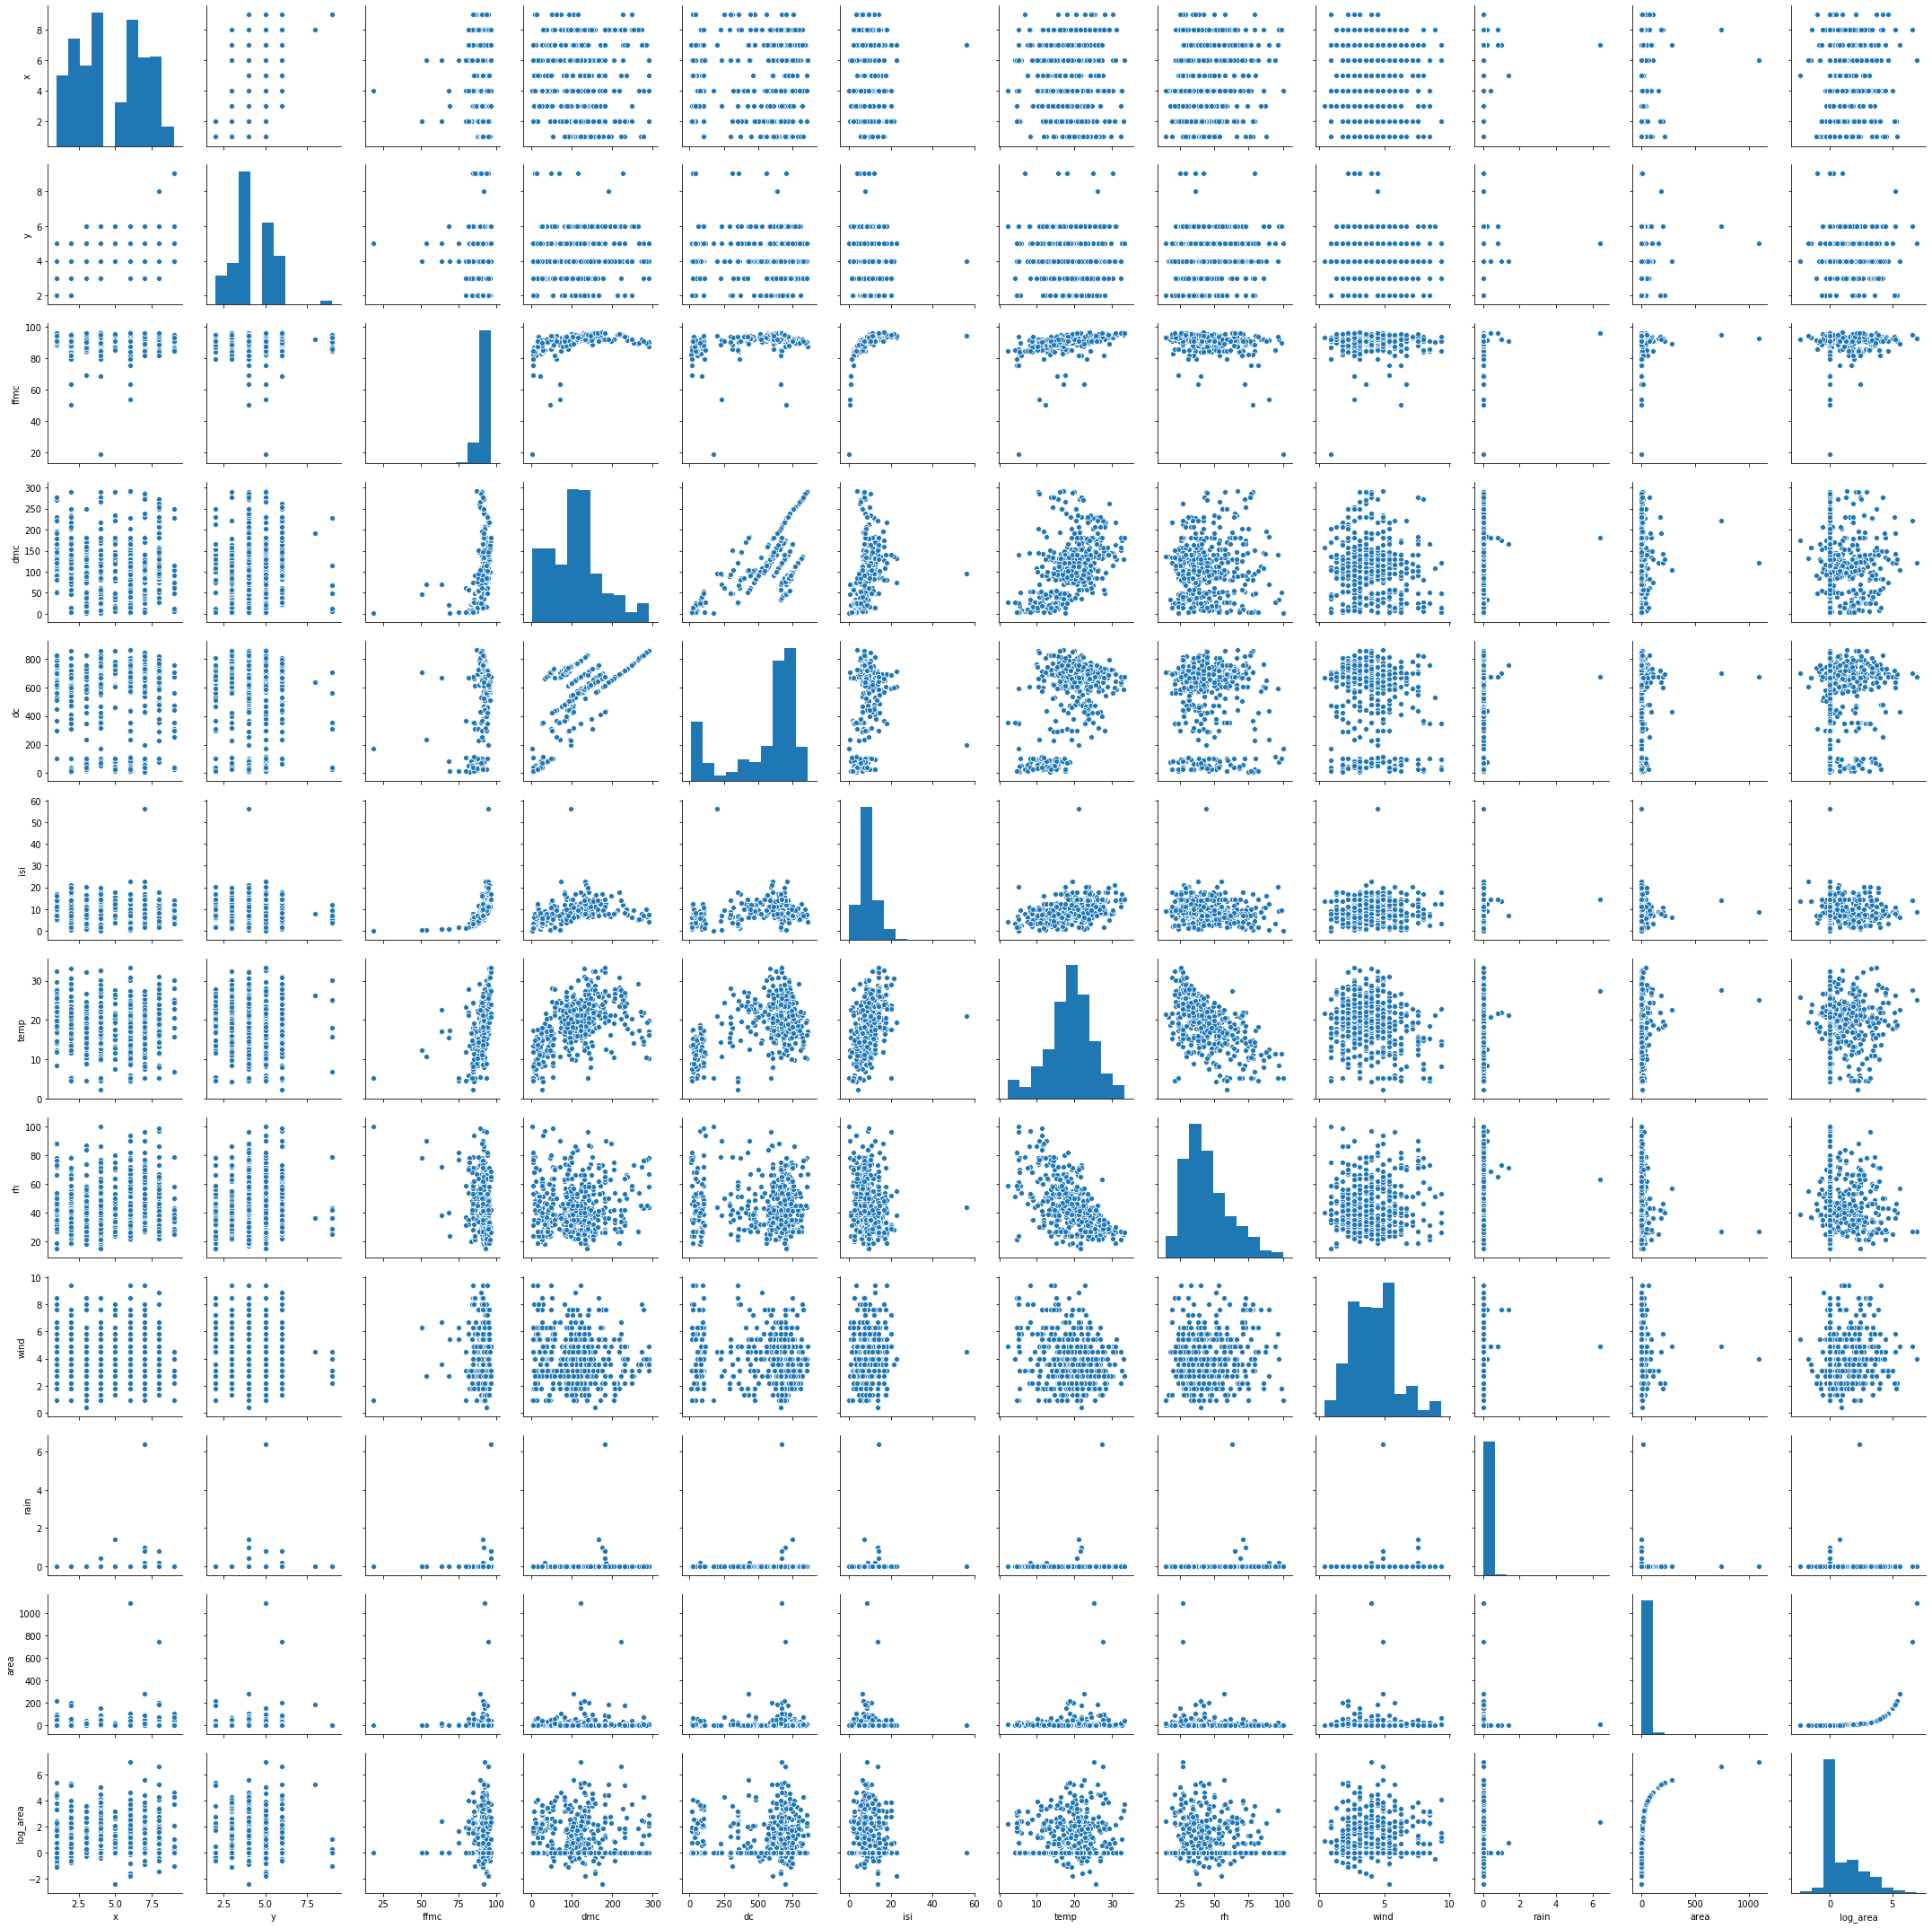

In [19]:
sns.pairplot(df)

In [34]:
df.describe()

,x,y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,log_area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.963451
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.437333
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,-2.407946
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.882514
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.994703


In [23]:
sns.heatmap(df)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [38]:
df['month'].value_counts()

8     184
9     172
3      54
7      32
2      20
6      17
10     15
12      9
4       9
5       2
1       2
11      1
Name: month, dtype: int64

In [37]:
df['month'].value_counts()

def month_to_num(str1):
    str1 = str1.capitalize() 
    dct = {   'Jan' : 1,
        'Feb' : 2,
        'Mar' : 3,
        'Apr' : 4,
        'May' : 5,
        'Jun' : 6,
        'Jul' : 7,
        'Aug' : 8,
        'Sep' : 9, 
        'Oct' : 10,
        'Nov' : 11,
        'Dec' : 12}
    return dct[f'{str1}']

df['month'] = df['month'].apply(month_to_num)
df.drop('day',axis=1,inplace=True)

In [40]:
df.drop('area', axis = 1, inplace = True)

In [42]:
df.head()

,x,y,month,ffmc,dmc,dc,isi,temp,rh,wind,rain,log_area
0,7,5,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
y = df['log_area'].values
X = df.drop('log_area', axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
#from sklearn.metrics import accuracy_score
# for val in range(10):
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.33)
clf = LinearRegression().fit(X_train_1,y_train_1)
print(clf.score(X_test,y_test))
#predicted_values = clf.predict(X_train_1)
#print(accuracy_score(y_test_1,predicted_values))
    

#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

-0.048958972254759196
